In [5]:
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score



In [6]:
df = pd.read_csv("/home/luo/projects/MDD/data/it-edi/train.tsv", sep='\t')
df.head()

,PID,Text_data,Label
0,train_pid_1,Waiting for my mind to have a breakdown once t...,moderate
1,train_pid_2,My new years resolution : I'm gonna get my ass...,moderate
2,train_pid_3,New year : Somone else Feeling like 2020 will ...,moderate
3,train_pid_4,"My story I guess : Hi, Im from Germany and my ...",moderate
4,train_pid_5,Sat in the dark and cried myself going into th...,moderate


In [7]:
def data_preprocessing (text):
    if isinstance(text, float):
        text=''

    text = text.lower()
    text = re.sub(r"http\s+|www\S+http\S+", "",text,flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub("user",'',text)
    text = re.sub("url",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

/tmp/ipykernel_3355007/2718693830.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df["Text_data"].apply(data_preprocessing)


<Axes: xlabel='Label', ylabel='count'>

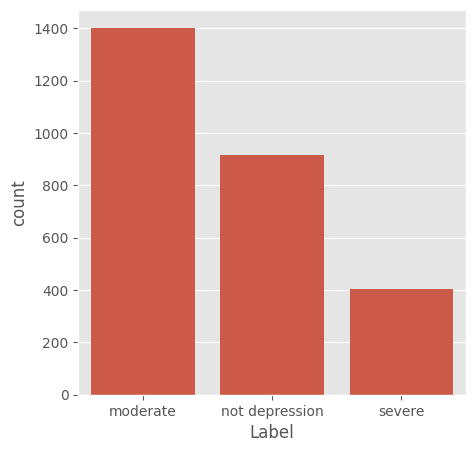

In [9]:

df.text = df["Text_data"].apply(data_preprocessing)
df = df.drop_duplicates('Text_data')
df['Label'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x = 'Label', data=df)

In [10]:
vect = TfidfVectorizer(ngram_range = (1,2)).fit(df['Text_data'])
feature_names = vect.get_feature_names_out()
print('Number of features :{}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features :150272

First 20 features: 
['00' '00 00' '00 47' '00 632' '00 because' '00 gonna' '00 including'
 '00 makes' '00 zero' '000' '000 000' '000 from' '000 is' '000 on'
 '000 or' '000 to' '000 whose' '000 worth' '00003' '00003 of']


In [11]:
X = df['Text_data']
Y = df['Label']
X = vect.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

x_train = x_train[y_train.notna()]
y_train = y_train.dropna()

x_test = x_test[y_test.notna()]
y_test = y_test.dropna()

print(f'size of x_train {x_train.shape}')
print(f'size of y_train {y_train.shape}')
print(f'size of x_test {x_test.shape}')
print(f'size of y_test {y_test.shape}')

size of x_train (2176, 150272)
size of y_train (2176,)
size of x_test (544, 150272)
size of y_test (544,)


In [12]:
svc = SVC()
svc.fit(x_train,y_train)
svc_predict = svc.predict(x_test)
cm = classification_report(y_test,svc_predict)
print(cm)

                precision    recall  f1-score   support

      moderate       0.56      0.93      0.70       277
not depression       0.75      0.34      0.47       184
        severe       1.00      0.02      0.05        83

      accuracy                           0.59       544
     macro avg       0.77      0.43      0.41       544
  weighted avg       0.69      0.59      0.52       544



Turning